In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [5]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 1.Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal)

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


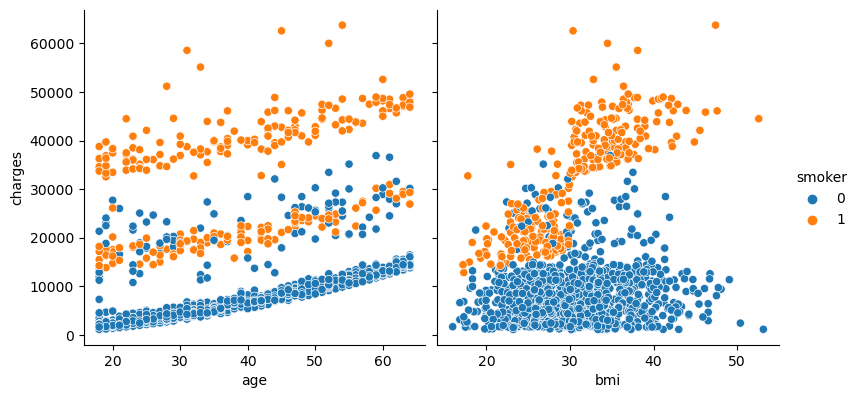

C:\Users\HP\AppData\Local\Temp\ipykernel_21120\844522508.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)


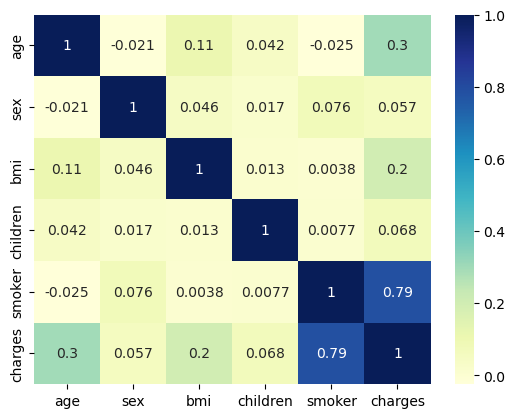

In [17]:
sns.pairplot(data, x_vars=['age', 'bmi',],
             y_vars='charges', size=4, aspect=1, kind='scatter', hue='smoker')
# sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
# plt.show()    
plt.show()
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

### 2.Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

In [24]:
# Misalnya, kita memiliki DataFrame 'data' dengan kolom 'age', 'sex', 'bmi', 'children', 'smoker', 'region', dan 'charges':
fitur = data[['age', 'sex', 'bmi', 'children', 'smoker']]

# Lakukan one-hot encoding pada kolom 'region'
fitur_encoded = pd.get_dummies(data['region'], prefix='region')

# Gabungkan fitur-fitur yang telah di-encoded dengan fitur-fitur lainnya
fitur = pd.concat([fitur, fitur_encoded], axis=1)

# Variabel target
target = data['charges']


In [25]:
X_train, X_test, y_train, y_test = train_test_split(fitur, target, test_size=0.2, random_state=42)


### 3.Lakukan feature scaling jika diperlukan.*Tidak perlu melakukan scaling*


### 4.Buat model multiple linear regression menggunakan Scikit-Learn.

In [32]:
from sklearn.linear_model import LinearRegression

# Membuat objek model Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 5.Latih model pada data latih dan lakukan prediksi pada data uji.

In [31]:
# Melatih model dengan data latih
model.fit(X_train, y_train)

# Setelah model dilatih, Anda dapat menggunakannya untuk membuat prediksi pada data uji
y_pred = model.predict(X_test)

### 6.Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

In [33]:
# Menghitung R-squared (R^2)
r2 = r2_score(y_test, y_pred)

# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Menghitung Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Menampilkan hasil evaluasi
print("R-squared (R^2):", r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

R-squared (R^2): 0.7835929767120723
Mean Squared Error (MSE): 33596915.85136146
Mean Absolute Error (MAE): 4181.194473753643


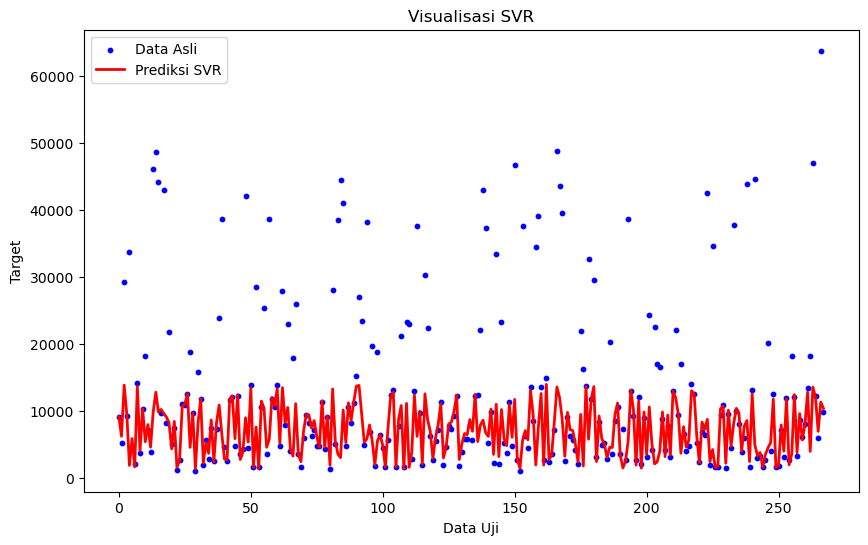

In [35]:
from sklearn.svm import SVR

# Buat model SVR dengan kernel linier (bisa diganti dengan kernel lain)
model_svr = SVR(kernel='linear', C=1.0)

# Latih model dengan data latih
model_svr.fit(X_train, y_train)

# Buat array data fitur (X_test) yang akan digunakan untuk visualisasi
X_vis = np.arange(len(X_test)).reshape(-1, 1)

# Lakukan prediksi dengan model SVR
y_pred_svr = model_svr.predict(X_test)

# Visualisasi data asli dan prediksi
plt.figure(figsize=(10, 6))
plt.scatter(X_vis, y_test, color='blue', label='Data Asli', s=10)
plt.plot(X_vis, y_pred_svr, color='red', label='Prediksi SVR', linewidth=2)
plt.title('Visualisasi SVR')
plt.xlabel('Data Uji')
plt.ylabel('Target')
plt.legend()
plt.show()